# Practical 7: Write a program to Apply edge detection techniques such as Sobel and Canny to extract meaningful information from the given image samples.

<Figure size 640x480 with 0 Axes>

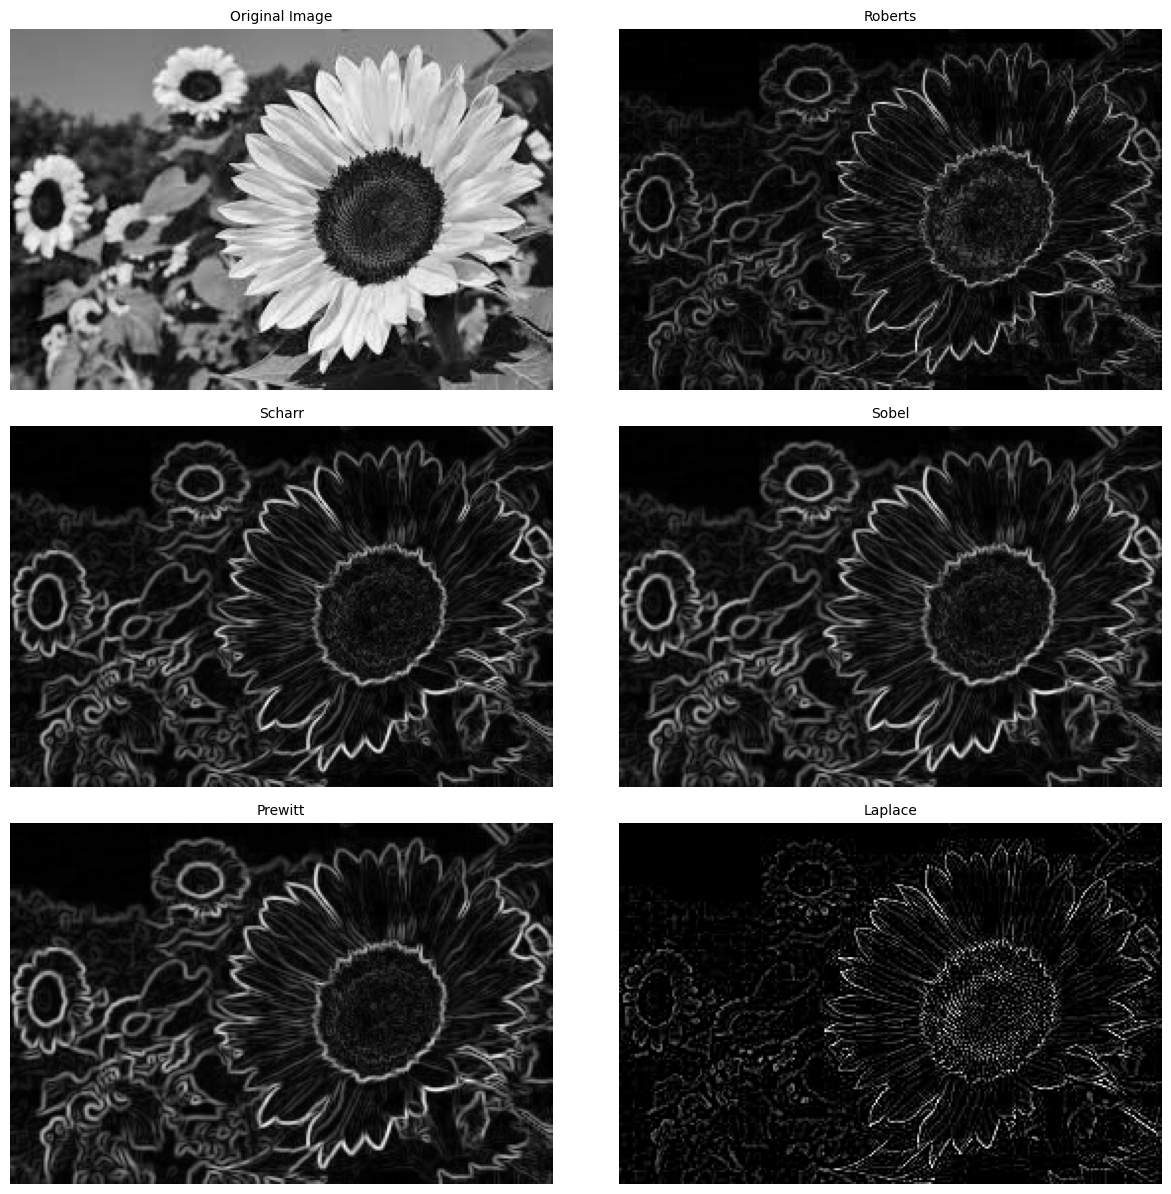

In [1]:
import numpy as np
from scipy import signal, misc, ndimage
from skimage import filters, feature, img_as_float 
from skimage.io import imread
from skimage.color import rgb2gray 
from PIL import Image, ImageFilter 
import matplotlib.pylab as pylab
from skimage.transform import rescale

def plot_image(image, title=""):
  pylab.title(title, size=10)
  pylab.imshow(image) 
  pylab.axis('off')

def plot_hist(r,g,b,title=""):
   r,g,b=img_as_ubyte(r),img_as_ubyte(g),img_as_ubyte(b) 
   pylab.hist(np.array(r).ravel(),bins=256, range=(0,256),color='r',alpha=0.3) 
   pylab.hist(np.array(g).ravel(),bins=256, range=(0,256),color='g',alpha=0.3)
   pylab.hist(np.array(b).ravel(),bins=256, range=(0,256),color='b',alpha=0.3)
   pylab.xlabel('Pixel Values', size=20) 
   pylab.ylabel('Frequency',size=20)
   pylab.title(title,size=10)


# Edge Detectors with scikit-image-Prewitt, roberts, sobel, scharr, laplace 
im=Image.open('F:/GitHub/Practical_BscIT_MscIT_Ninad/MscIT/Semester 2/ImageProcessing/Dataset/sunflower.jpg').convert('L')
im = img_as_float(im)  # convert to floating point dtype
pylab.gray() 
pylab.figure(figsize=(15,15))
pylab.subplot(3,2,1), plot_image(im,'Original Image') 
edges=filters.roberts(im)
pylab.subplot(3,2,2), plot_image(edges,'Roberts')

edges=filters.scharr(im)
pylab.subplot(3,2,3), plot_image(edges,'Scharr')

edges=filters.sobel(im)
pylab.subplot(3,2,4), plot_image(edges,'Sobel')

edges=filters.prewitt(im)
pylab.subplot(3,2,5), plot_image(edges,'Prewitt')

edges=np.clip(filters.laplace(im), 0,1) 
pylab.subplot(3,2,6), plot_image(edges,'Laplace') 
pylab.subplots_adjust(wspace=0.1,hspace=0.1) 
pylab.show()


<Figure size 640x480 with 0 Axes>

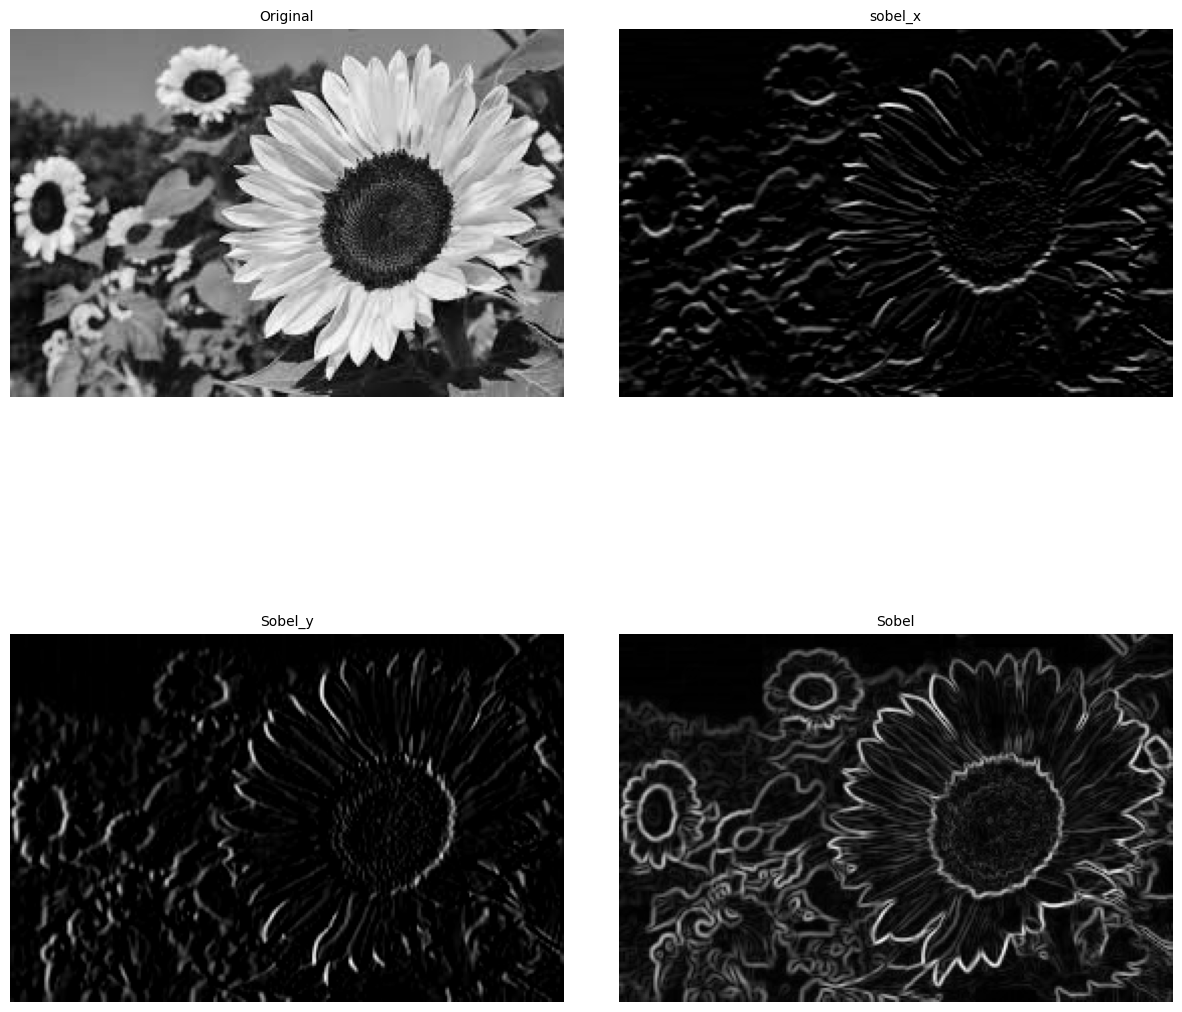

In [2]:
#SOBEL
im = Image.open('F:/GitHub/Practical_BscIT_MscIT_Ninad/MscIT/Semester 2/ImageProcessing/Dataset/sunflower.jpg').convert('L') 
im_array = np.array(im)
pylab.gray()
pylab.figure(figsize=(15,15)) 
pylab.subplot(2,2,1), plot_image(im,'Original')
pylab.subplot(2,2,2) 
edges_x=filters.sobel_h(im_array) 
plot_image(np.clip(edges_x,0,1),'sobel_x')

pylab.subplot(2,2,3) 
edges_y=filters.sobel_v(im_array) 
plot_image(np.clip(edges_y,0,1),'Sobel_y')

pylab.subplot(2,2,4) 
edges=filters.sobel(im_array) 
plot_image(np.clip(edges,0,1),'Sobel')

pylab.subplots_adjust(wspace=0.1,hspace=0.1)
pylab.show()


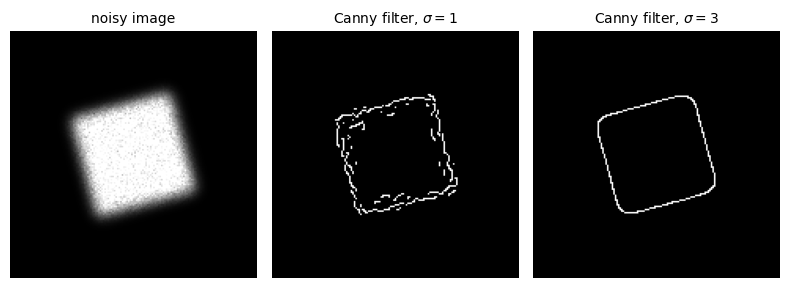

In [3]:
#CANNY
import matplotlib.pyplot as plt 
from scipy import ndimage as ndi
from skimage.util import random_noise 
from skimage import feature

# Generate noisy image of a square
image = np.zeros((128, 128), dtype=float) 
image[32:-32, 32:-32] = 1

image = ndi.rotate(image, 15, mode='constant') 
image = ndi.gaussian_filter(image, 4)
image = random_noise(image, mode='speckle', mean=0.05)

# Compute the Canny filter for two values of sigma 
edges1 = feature.canny(image)
edges2 = feature.canny(image, sigma=3)

# display results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

ax[0].imshow(image, cmap='gray') 
ax[0].set_title('noisy image', fontsize=10)

ax[1].imshow(edges1, cmap='gray') 
ax[1].set_title(r'Canny filter, $\sigma=1$', fontsize=10)

ax[2].imshow(edges2, cmap='gray') 
ax[2].set_title(r'Canny filter, $\sigma=3$', fontsize=10)

for a in ax: 
    a.axis('off')
fig.tight_layout() 
plt.show()
